# Designing a least squares-based classification algorithm

In [187]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


In [34]:
# Fetching Data
train=pd.read_csv(r'C:\Users\ahmed\Desktop\Machine Learing\Assignments\Ass1\Train.csv')
test=pd.read_csv(r'C:\Users\ahmed\Desktop\Machine Learing\Assignments\Ass1\Test.csv')

In [35]:
# Separate Species in Train
data_versi=train[train['Species']=='Iris-versicolor']
data_virgi=train[train['Species']=='Iris-virginica']
data_setosa=train[train['Species']=='Iris-setosa']

In [36]:
#dropping Species coulmn in Train
versiDfM=data_versi.drop('Species', 1)
virgiDfM=data_virgi.drop('Species', 1)
setosaDfM=data_setosa.drop('Species', 1)

In [37]:
# Droping first two columns
test_label=test.drop(['PetalLengthCm','PetalWidthCm'],1)

In [38]:
# Droping Species column in test
test_data=test.drop('Species',1)

In [39]:
# Converting from DataFrame to a List
test_label_list=test_label.values.tolist()

In [40]:
#converting from dataframe to matrix
versiM=versiDfM.to_numpy() #len=37
virgiM=virgiDfM.to_numpy() #len=37
setosaM=setosaDfM.to_numpy() #len=31

In [41]:
#concatenating
virgiXsetosa=np.concatenate((virgiM, setosaM)) #len=68
virgiXversi=np.concatenate((virgiM, versiM)) #len=74
versiXsetosa=np.concatenate((versiM, setosaM)) #len=68

In [42]:
#first equation (virginica,setosa &versicolor)

x1=np.concatenate((versiM,virgiXsetosa))
x1_tilda = np.concatenate((x1, np.ones((105,1))), axis=1) 

t11=np.full((len(versiM), 1), 1)
t12= np.full((len(virgiXsetosa), 1), -1)
t1=np.concatenate((t11,t12))
w1= np.linalg.inv(x1_tilda.T @ x1_tilda) @ x1_tilda.T @ t1
w1

array([[ 0.57079356],
       [-1.18057071],
       [-1.0433656 ]])

In [50]:
#second equation (virginica,versicolor &setosa)

x2=np.concatenate((setosaM,virgiXversi))
x2_tilda = np.concatenate((x2, np.ones((105,1))), axis=1) 

t21=np.full((len(setosaM), 1), 1)
t22= np.full((len(virgiXversi), 1), -1)
t2=np.concatenate((t21,t22))
w2= np.linalg.inv(x2_tilda.T @ x2_tilda) @ x2_tilda.T @ t2
w2

array([[-0.50070391],
       [ 0.03941776],
       [ 1.48011265]])

In [51]:
#third equation (versicolor,setosa &virginica)

x3=np.concatenate((virgiM,versiXsetosa))
x3_tilda = np.concatenate((x3, np.ones((105,1))), axis=1) 

t31=np.full((len(virgiM), 1), 1)
t32= np.full((len(versiXsetosa), 1),-1)
t3=np.concatenate((t31,t32))
w3= np.linalg.inv(x3_tilda.T @ x3_tilda) @ x3_tilda.T @ t3
w3

array([[-0.07008965],
       [ 1.14115295],
       [-1.43674706]])

In [52]:
# Creating An Empty Array to store output
model_output=[]

In [53]:
# Looping in test_data to categorize the data
for i in range(0,len(test_data)):
    eq_versi=w1[0]*test_data.iloc[i][0]+w1[1]*test_data.iloc[i][1]+w1[2]
    eq_setosa=w2[0]*test_data.iloc[i][0]+w2[1]*test_data.iloc[i][1]+w2[2]
    eq_virgi=w3[0]*test_data.iloc[i][0]+w3[1]*test_data.iloc[i][1]+w3[2]
    
    if eq_versi>eq_setosa and eq_versi>eq_virgi:
        model_output.append('Iris-versicolor')
    elif eq_setosa>eq_versi and eq_setosa>eq_virgi:
        model_output.append('Iris-setosa')
        
    else:
        model_output.append('Iris-virginica')

In [54]:
# Converting the List to a DataFrame
model_output_df=pd.DataFrame(model_output,columns=['Species'])

In [55]:
# Calculating the classification accuracy for the test data
def classification_accuracy(test_label,model_output_df):
        correct = 0
        for i in range(0,len(test_label)):
            if test_label.iloc[i].equals( model_output_df.iloc[i]):
                correct += 1
        return correct / float(len(test_label)) * 100.0
print(classification_accuracy(test_label,model_output_df))   

82.22222222222221


In [ ]:
            #versicolor setosa virginica
#versicolor
#setosa
#virginica

In [144]:
def getRow(i):
    r=0 
    if test_label_list[i]==['Iris-versicolor']:
        r=0
    elif test_label_list[i]==['Iris-setosa']:
        r=1
    else:
        r=2
    return r

def getCoulmn(i):
    c=0 
    if model_output[i]=='Iris-versicolor':
        c=0
    elif model_output[i]=='Iris-setosa':
        c=1
    else:
        c=2
    return c

In [186]:
#confusion matrix
conf_array=[[0,0,0],[0,0,0],[0,0,0]]

for i in range(0,len(test_label_list)):
    conf_array[getRow(i)][getCoulmn(i)]+=1
    
conf_matrix=np.array(conf_array).reshape(3,3)
conf_matrix

array([[ 5,  0,  8],
       [ 0, 19,  0],
       [ 0,  0, 13]])

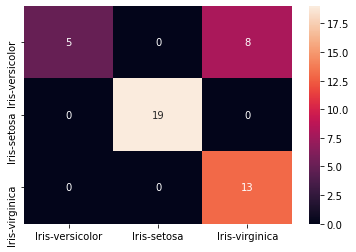

In [200]:
#converting confusion matrix to an image
classes=["Iris-versicolor","Iris-setosa","Iris-virginica"]
cfm_DF= pd.DataFrame(conf_matrix, index = classes, columns = classes)
cfm_plot = sn.heatmap(cfm_DF, annot=True)
cfm_plot.figure.savefig("cfm.png")